# Multi-Modal Data Fusion - Exercise 1: Python tools and data fusion basics


## Learning goals

After this exercise, you should

- know how to compute and plot PDF and CDF of normal distribution
- be able to use decision tree classifier to solve a classification problem
- know how to split dataset into training and testing sets and evaluate the performance of the machine learning model using confusion matrix
- get familar with data fusion basics
- be able to use logistic regression classifier
- be able to apply clustering algorithms
- be able to model multi-sensor uncertainty in simplified setting

## Relevant lecture

Lecture 1-2.

## Relevant chapters in course book

Chapters 1-3.

## Additional material

- Scipy https://docs.scipy.org/doc/scipy/reference/stats.html
- Scikit-learn https://scikit-learn.org/stable/

# Tutorial

## scipy
https://docs.scipy.org/doc/scipy/reference/stats.html

We discuss another Python module which is useful in many aspects of statistics and probability. Our focus is on the normal distribution $N(\mu,\sigma)$

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

First we have the probability density function (pdf) which we defined ourselves in Exercise 0 and the cumulative distribution function (cdf) which cannot be expressed using elementary functions.

In [2]:
p = stats.norm.pdf(1)
c = stats.norm.cdf(1)
print(p,c)

0.24197072451914337 0.8413447460685429


In order to get a better understanding of these we plot them.

The plot of PDF appearing on Wikipedia page of Gaussian distribution can be prepared as follows:

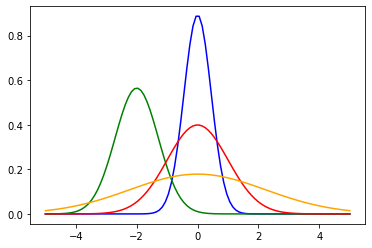

In [3]:
x = np.linspace(-5,5,100)
plt.plot(x,stats.norm(0,np.sqrt(0.2)).pdf(x),c="blue")
plt.plot(x,stats.norm(-2,np.sqrt(0.5)).pdf(x),c="green")
plt.plot(x,stats.norm(0,1).pdf(x),c="red")
plt.plot(x,stats.norm(0,np.sqrt(5)).pdf(x),c="orange")

And the same for CDF:

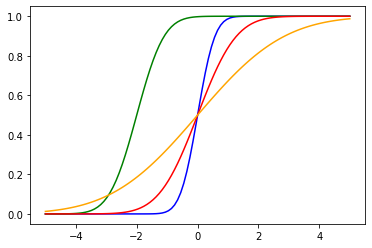

In [4]:
plt.plot(x,stats.norm(0,np.sqrt(0.2)).cdf(x),c="blue")
plt.plot(x,stats.norm(-2,np.sqrt(0.5)).cdf(x),c="green")
plt.plot(x,stats.norm(0,1).cdf(x),c="red")
plt.plot(x,stats.norm(0,np.sqrt(5)).cdf(x),c="orange")


## sklearn

Let us continue to explore some main concepts from machine learning. As a case example we use the iris data set introduced in Exercise 0. Our goal is to predict the last column (species) based on the first four columns containing flower measurements.

It is good practice in supervised machine learning to split the original data set into two parts: training and testing sets. Here we use 75 % of the data for training and the rest for testing the performance of the model. sklearn provides handy functions for this too.

In [5]:
df = pd.read_csv('iris.csv')
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


We solve the classification problem now with decision tree classifier.

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state = 1)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

When assessing the performance of the model one often uses the confusion matrix in classification problems. In binary classification case this is a 2x2 matrix containing four numbers as follows:


|  | P predicted| N predicted |
| --- | --- | --- |
| P class| TP | FP |
| N class| FN | TN |

where 

- TP stands for true positive i.e. correctly predicted trues (or 1's)
- TN stands for true negative i.e. correctly predicted falses (or 0's)
- FP stands for false positive i.e. incorrectly predicted trues
- FN stands for false negative i.e. incorrectly predicted falses.

The precision score of the model is the ratio
$$
\frac{TP}{TP+FP}
$$
and accuracy is the ratio
$$
\frac{TP+TN}{n}
$$


These can be extended for non-binary classification problems straightforwardly. In ideal case we would like to have most of the predictions on the diagonal of the confusion matrix.

Here is how to compute and plot the confusion matrix in sklearn. Note that we do not pass in the predicted labels, only model, correct labels and test variables when plotting the matrix.

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


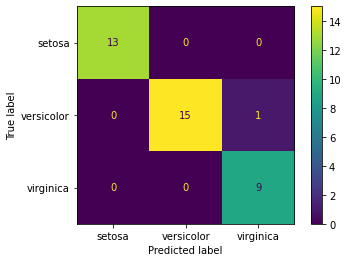

In [7]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,prediction))
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

Precision score for each class and accuracy can be found in sklearn's classification report or individually.

In [8]:
print(metrics.classification_report(y_test, prediction))
print(metrics.accuracy_score(y_test,prediction))
print(metrics.precision_score(y_test,prediction,average=None))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158
[1.  1.  0.9]


# Assignments
Below you will find the assignments to be returned. Use code cells and markdown cells to type your answers where appropriate. 

## Multiple choice questions
Indicate one answer clearly to each question. 

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 1</b>

<p>Geographical area is covered with temperature, humidity and vision sensors to assess the probability of forest fires in the area. In terms of data fusion scheme, what is the fusion type of this setup?</p>
    
<p>A) across sensors</p>
    
<p>B) across attributes</p>
    
<p>C) across domains</p>
<p>D) across time</p>
    
    

</div>

B) across attributes

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Problem 2</b>

    
<p> Consider a fusion process where two or more overlaying camera images are fused together to reduce noise in images. What is the sensor configuration in this setup?</p>
<p>A) complementary</p>
    
<p>B) competitive</p>
    
<p>C) cooperative</p>

</div>

C) cooperative

<a id='Task1.3'></a>
<div class=" alert alert-warning">
    <b>Problem 3</b>

    
<p> Consider a sensor measuring barometric pressure. The sensor is used to measure altitude, but includes offset to estimate absolute height. What type of sensor error this represents?</p>
<p>A) Random error</p>
    
<p>B) Systematic error</p>
    
<p>C) Spurious reading error</p>

</div>

B) systematic error

<a id='Task1.4'></a>
<div class=" alert alert-warning">
    <b>Problem 4</b>

    
<p> Consider a GPS localization system where noisy measurements are temporally fused with extended Kalman Filter. What type of fusion network architecture this system represents?</p>
<p>A) Parallel network system</p>
    
<p>B) Serial network system </p>
    
<p>C) Iterative network system</p>

</div>

A) Parallel network system

<a id='Task1.5'></a>
<div class=" alert alert-warning">
    <b>Problem 5</b>

    
<p> Put in order (from best to worst) the fusion topologies based on how they can handle the redudant information processing problem</p>
<p>A) Centralized fusion</p>
    
<p>B) Decentralized fusion</p>
    
<p>C) Hierarchical fusion</p>

</div>

A, C, B

## scipy

Use Python (and its modules) to answer to the following problems.

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 6</b>

<p>Consider the standard normal distribution with zero mean and unit standard deviation. About 68 % of the values drawn from the distribution are within one standard deviation away from the mean. How large portion of the values are within 1.5 standard deviations from the mean? Plot the probability distribution function and shade the area corresponding to this portion. Your plot should look something like this:
    <img src="norm_shaded.png" />    </p>
You are free to choose your own colors, axis labels, titles etc.
</div>

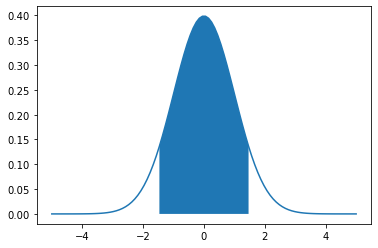

In [9]:
y_values = stats.norm(0,1).pdf(x)
plt.plot(x,y_values)
plt.fill_between(x, y_values, where=(-1.5 <= x) & (1.5 >= x))
plt.show()


## sklearn

<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 7</b>

<p>Consider the dataset containing peoples heights (inches) and weights (pounds).</p>
<p>a) Plot in same figure the observations corresponding to males and femals separately. Use different color for these classes.</p>
    <p>b) Choose sex for target variable and weight and height for explanatory variables.</p>
    <p>c) Split dataset into training set and test set with 80/20 ratio.</p>
    <p>d) Train logistic regression classifier from sklearn with training data.</p>
    <p>e) Plot confusion matrix of your trained model.</p>
    <p>f) Predit sex of a person whose height is 175 cm and weight is 82 kg.</p>
</div>

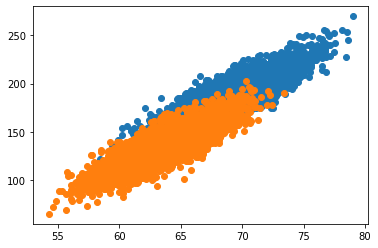

In [10]:
# a)
df_hw = pd.read_csv('weight-height.csv')
males = df_hw.loc[df_hw['Gender'] == 'Male']
females = df_hw.loc[df_hw['Gender'] == 'Female']
plt.scatter(males['Height'], males['Weight'])
plt.scatter(females['Height'], females['Weight'])
plt.show()

In [11]:
# b)
genders = df_hw['Gender']
features = df_hw[['Height', 'Weight']]
# print(features)

In [12]:
# c)
genders_train, genders_test, features_train, features_test = train_test_split(genders, features, test_size=0.2, random_state=0)
# print(genders_train)
# print(features_train)

In [13]:
# d)
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(features_train, genders_train)

LogisticRegression()

[[937  75]
 [ 80 908]]


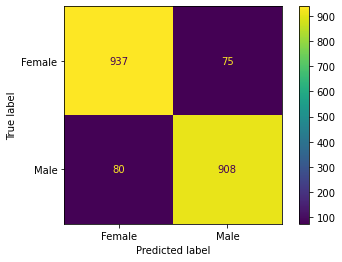

In [14]:
# e)
predictions = logr.predict(features_test)
# print(predictions)
print(metrics.confusion_matrix(genders_test,predictions))
metrics.plot_confusion_matrix(logr, features_test, genders_test)
plt.show()

In [15]:
# f)
height = 175/2.54
weight = 82/0.454
# print(height)
# print(weight)
prediction = logr.predict([[height, weight]])
print(prediction)

['Male']


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Problem 8</b>

<p>Consider the dataset from file bananas.csv. </p>
    <p>a) Plot all observations from second column (y-value) against the first column (x-value) in black dots.</p>
    <p>b) Apply K-means clustering algorithm from sklearn with 2 clusters. Plot the resulting class labels with different colors in same figure. So: dots labeled 1 in one color and dots labeled 0 in another color.</p>
    <p>c) Apply spectral clustering algorithm from sklearn with 2 clusters and parameter affinity='nearest_neighbors'. Plot labels as in step b).</p>
 <p>d) Interpret results by comparing the outcomes of the two algorithms.</p>
</div>

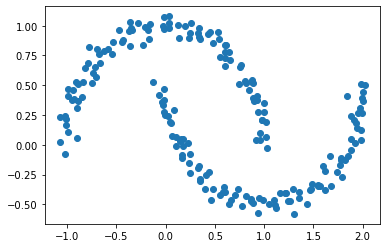

In [16]:
# a)
df_banana = pd.read_csv('bananas.csv')
# print(df_banana['x'])
plt.scatter(df_banana['x'], df_banana['y'])
plt.show()

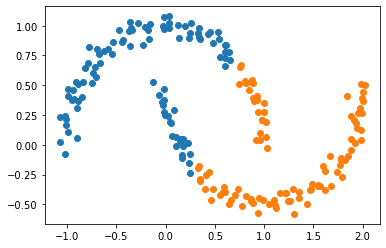

In [17]:
# b)
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans_banana_clusters = kmeans.fit(df_banana)
kmeans_cluster_1 = df_banana.loc[kmeans_banana_clusters.labels_ == 0]
kmeans_cluster_2 = df_banana.loc[kmeans_banana_clusters.labels_ == 1]
plt.scatter(kmeans_cluster_1['x'], kmeans_cluster_1['y'] )
plt.scatter(kmeans_cluster_2['x'], kmeans_cluster_2['y'] )
plt.show()

C:\Users\essiv\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


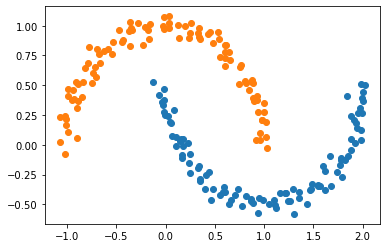

In [18]:
# c)
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity = 'nearest_neighbors')
sc_banana_clusters = sc.fit(df_banana)
sc_banana_cluster_1 = df_banana.loc[sc_banana_clusters.labels_ == 0]
sc_banana_cluster_2 = df_banana.loc[sc_banana_clusters.labels_ == 1]
plt.scatter(sc_banana_cluster_1['x'], sc_banana_cluster_1['y'] )
plt.scatter(sc_banana_cluster_2['x'], sc_banana_cluster_2['y'] )
plt.show()

d)
K-means assumes that the clusters are spherical or convexical in shape, so it struggles with clusters that are not. Spectral clustering is more flexible because it takes into account the distances of the points of the clusters themselves by using the eigenvalues of similarity matrices.

## Multi-sensor spurious measurement

<a id='Task1.9'></a>
<div class=" alert alert-warning">
    <b>Problem 9</b>

<p>Let's consider multiple sensors measuring temperature. Calculate the probability of each measurement being spurious when measurements are $\mathbf{y} = [10, 11, 9, 25, 12]$ and their confidence $\mathbf{\sigma} = [2, 2, 3, 5, 2]$. Model parameter $\theta$ is fixed to median of measurements $\mathbf{y}$. Use equations in slides 19-21 (Lecture 2). $\beta_k$ values can be fixed to bound given in eq. in slide 21 (i.e. $\beta_k^2 = 2\sigma_k^2 \prod_{l=1,l \ne k}^K (y_k - y_l)^2$). Implement your solution to the given function stubs and evaluate/print how good the measurements are based on the estimated probabilities.</p>

</div>

In [33]:
import numpy as np

# calculate betas
def get_beta(y, sigma):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    i = 0
    beta = list(range(len(y)))
    for y_value, sigma_value in zip(y,sigma):
        y_copy = y.copy()
        y_copy = np.delete(y_copy, i)
        y_mult = np.prod([y_value - y_copy_value for y_copy_value in y_copy])
#         print(y_mult)
        beta[i] = np.sqrt(2)*sigma_value*y_mult
        i += 1
    return beta

# calculate alphas
def get_alpha(y, beta):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    i = 0
    alpha = list(range(len(y)))
    for y_value, beta_value in zip(y,beta):
        y_copy = y.copy()
        y_copy = np.delete(y_copy, i)
        y_mult = np.prod([y_value - y_copy_value for y_copy_value in y_copy])  
        alpha[i] = beta_value/y_mult
    return alpha

# calculate probabilities
def probability_of_spurious_measurement(theta, y, sigma):
    ## IMPLEMENT YOUR SOLUTION HERE ##
    b = get_beta(y, sigma)
#     print(b)
    a = get_alpha(y, b)
#     print(a)
    probs = [1 - np.exp(-((theta-y_value)/(a_value))**2)  for y_value, a_value in zip(y,a)]
    return probs

# temperature measurements from different sensors
y = np.array([10, 11, 9, 25, 12])
# sensor confidence
sigma = np.array([2, 2, 3, 5, 2])
# model parameter
theta = np.median(y)

probs = probability_of_spurious_measurement(theta, y, sigma)

## calculate and print results
print('Probabilities:', probs)

Probabilities: [0.0, 0.0, 0.6321205588285577, 0.9999999996516376, 0.06058693718652419]


<ipython-input-33-0602d9cb2534>:26: RuntimeWarning: divide by zero encountered in double_scalars
  alpha[i] = beta_value/y_mult
